In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Lucknow.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Mubeen's,300,Mughlai,Lucknow,Chowk,Quick Bites,730am to 12midnight(Mon-Sun),Very Good,4.4,1363
1,Mahalaxmi Sweets,550,"Mithai,North Indian,Chinese",Lucknow,Aliganj,Sweet Shop,"8am to 5pm,6pm to 1130pm(Mon-Sun)",Very Good,4.3,1068
2,Munick Bistro & Bar,1200,"Chinese,Continental,European,German,Indian",Lucknow,Gomti Nagar,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.5,833
3,Skyhilton,1500,"North Indian,Chinese,Continental",Lucknow,Alambagh,Casual Dining,12noon to 12midnight(Mon-Sun),Very Good,4.1,753
4,Mocha,1500,"Italian,Continental,Bakery",Lucknow,Anand Plaza-- Patkapuram-- Gomti Nagar,Casual Dining,12noon to 12midnight(Mon-Sun),Excellent,4.5,1778


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 10 columns):
Name                1421 non-null object
Price               1421 non-null int64
Cuisine_Category    1421 non-null object
City                1421 non-null object
Region              1421 non-null object
Cuisine_Type        1421 non-null object
Timing              1415 non-null object
Rating_Types        1421 non-null object
Rating              1421 non-null float64
Votes               1421 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 111.1+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,1421.000000,1421.000000,1421.000000
mean,443.631246,3.486418,126.040816
std,295.693578,0.426142,228.116988
min,0.000000,2.200000,4.000000
25%,250.000000,3.200000,17.000000
50%,350.000000,3.500000,43.000000
75%,500.000000,3.800000,126.000000
max,2400.000000,4.900000,2421.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              6
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Al-Baike           7
Al-Baik.Com        5
Burger Point       4
Noodle Station     4
Frozen Junction    4
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Gomti Nagar      332
Aliganj          231
Indira Nagar     160
Hazratganj       105
Alambagh          96
Aashiana          83
Chowk             57
Rajajipuram       47
Khurram Nagar     43
Lalbagh           37
Name: Region, dtype: int64

Text(0.5,1,'Region')

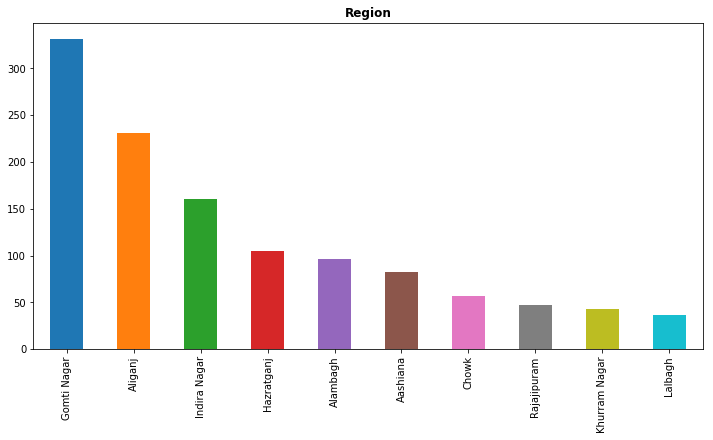

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

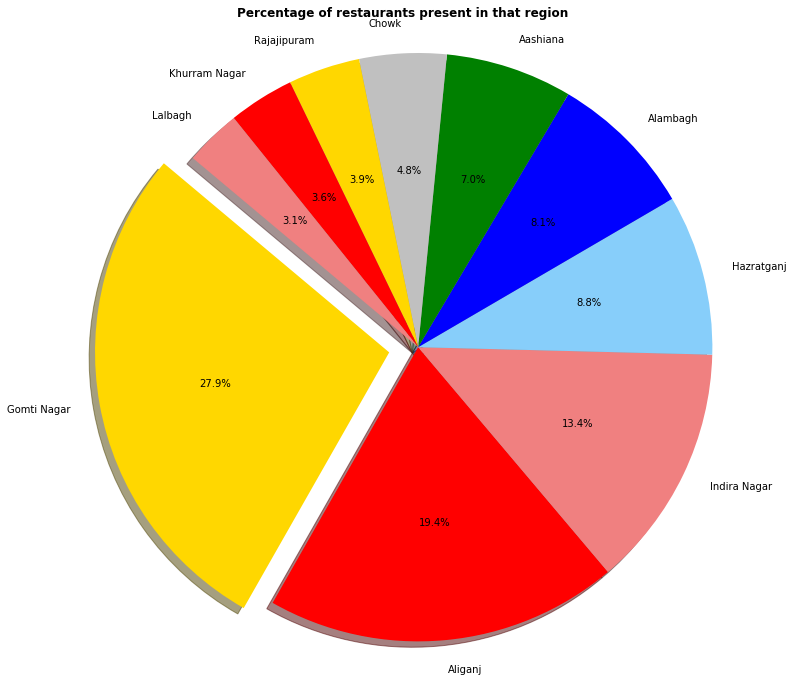

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average      658
Good         547
Very Good    188
Excellent     16
Poor          11
Dobré          1
Name: Rating_Types, dtype: int64

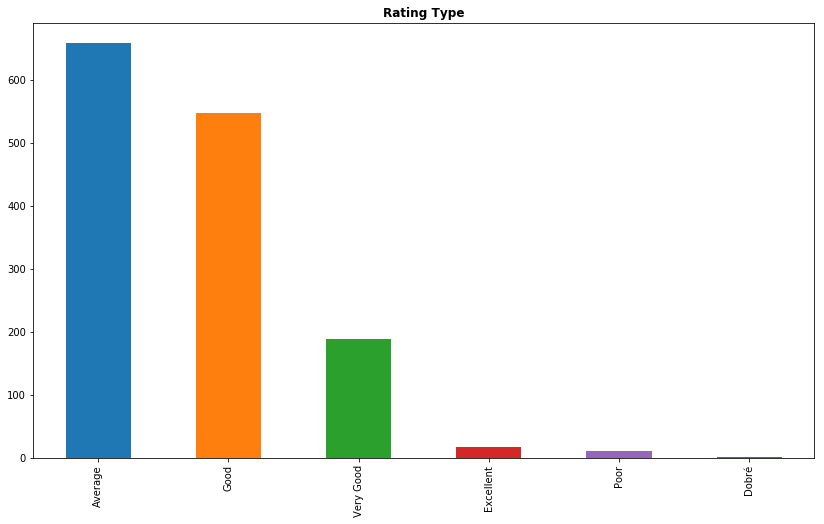

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       674
Casual Dining     304
Café               92
none               89
Dessert Parlor     58
Bakery             55
Sweet Shop         38
Food Court         26
Dhaba              20
Lounge             16
Name: Cuisine_Type, dtype: int64

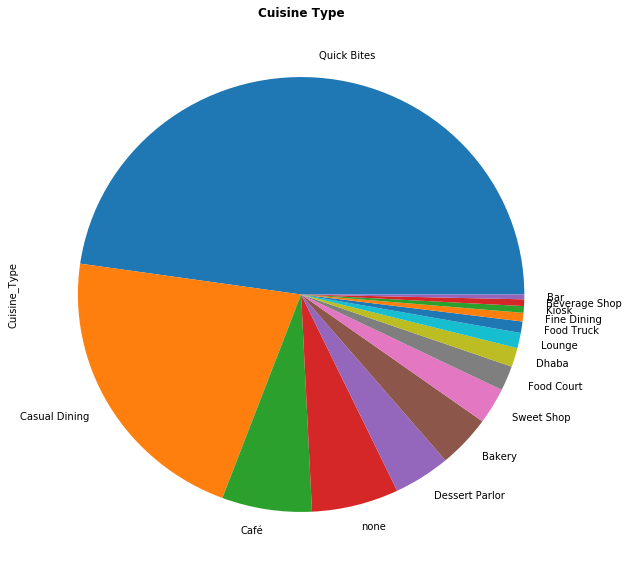

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.487137809187278


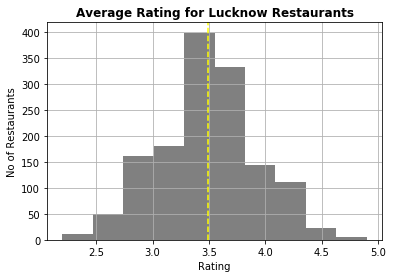

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Lucknow Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Lucknow is found to be around 3.48

# Top cuisines in Lucknow

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

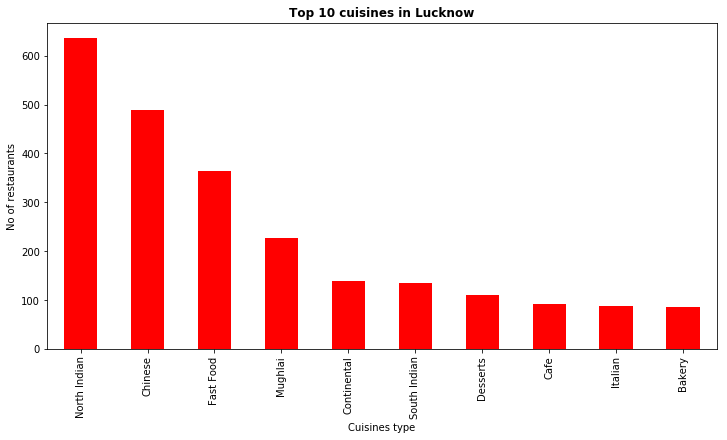

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Lucknow',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     262
500     186
400     158
200     139
250     118
600      86
350      73
150      72
1000     50
800      39
100      39
450      35
700      32
550      21
1200     17
1500     16
650      12
750      10
850       9
900       7
Name: Price, dtype: int64

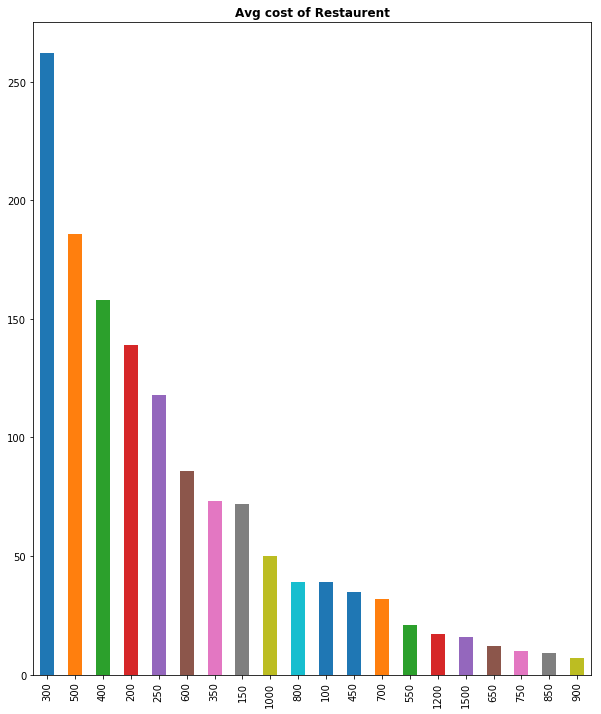

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

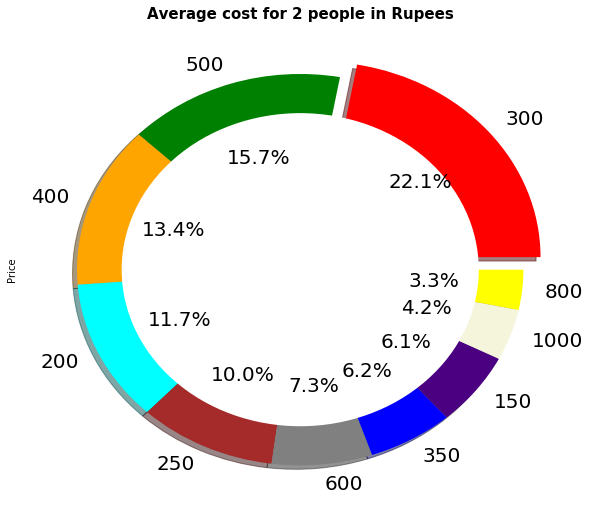

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300